In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
import boto3
import tarfile
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn import metrics
import joblib

In [3]:
sensor_data = pd.read_csv('sensor_data.csv')
print(sensor_data)


        Sensor 1     Sensor 2     Sensor 3     Sensor 4     Sensor 5  \
0    41857.42188  57722.66016  41816.39844  44943.82031  41491.08594   
1    40738.38281  43522.61328  38531.00391  35486.55469  23054.75586   
2    30274.36133  40467.91016  27397.25977  31067.96094  24348.48828   
3    23659.88867  33534.18750  20565.55273  24615.38477  21094.26563   
4    28476.08398  43083.13672  26947.36914  29809.03516  24758.22070   
..           ...          ...          ...          ...          ...   
157  48696.97656  64974.62109  50723.20313  56313.24219  57028.29297   
158  57840.03516  82341.58594  56350.42969  60206.96094  58756.02344   
159  32364.09570  45567.81641  35486.55469  41370.39453  55327.42578   
160  39457.46094  58594.64453  32686.41406  42440.31641  51395.30078   
161  38811.40234  58796.50781  25744.16797  35078.10547  50453.29297   

        Sensor 6     Sensor 7     Sensor 8  Label   
0    44991.21094  42737.89844  55148.64453       1  
1    25884.73242  21326.22461

In [4]:
features = ['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4', 'Sensor5', 'Sensor6', 'Sensor7', 'Sensor8']

sensor_data.columns = sensor_data.columns.str.replace(' ', '')

x = sensor_data.loc[:, features].values

y = sensor_data.loc[:, ['Label']].values

# scaler = StandardScaler()
# x = scaler.fit_transform(x)

# print(x.mean(), x.std())


In [5]:
# 70-30 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training set shape:", x_train.shape)
# print("Validation set shape:", x_val.shape)
print("Test set shape:", x_test.shape)

print("Y train shape:", y_train.shape)
# print("Y validation shape:", y_val.shape)
print("Y test shape:", y_test.shape)

Training set shape: (129, 8)
Test set shape: (33, 8)
Y train shape: (129, 1)
Y test shape: (33, 1)


In [6]:
# PCA
pca = PCA(n_components=3)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

principal_df = pd.DataFrame(data = x_train
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [7]:
# principal_df

In [8]:
x_test

array([[  18218.82431516,    -757.20404764,     955.95369833],
       [ 113719.4165091 ,    2172.00369344,     890.12628586],
       [   -819.36862257,   36127.36798579,  -15434.34840243],
       [  59274.8217475 ,   -4719.69028592,   -2068.10424183],
       [-100831.62901986,   10120.73825387,    2307.30844445],
       [  36722.4553855 ,    5263.84088664,   -1987.8850407 ],
       [  31343.36903929,   -8166.32780498,     964.88248377],
       [  95303.81049716,    -432.43418048,     215.2503809 ],
       [   7529.31095824,   -7469.17903391,    1733.20496404],
       [ -78551.93161981,    -707.83420238,   -1929.99166739],
       [  23062.43175371,   12643.6024027 ,    1481.58700709],
       [ -46344.23299593,  -14733.86725385,    1238.48789768],
       [ -15251.97999372,   18620.2385484 ,   -8092.27921613],
       [ -73775.60153806,    6399.16616747,   -4680.66568796],
       [ -17310.99069776,   14901.07060288,   -3934.40670707],
       [  39685.67697097,    2472.28019281,   -1951.321

In [9]:
final_df = pd.concat([principal_df, sensor_data[['Label']]], axis = 1)

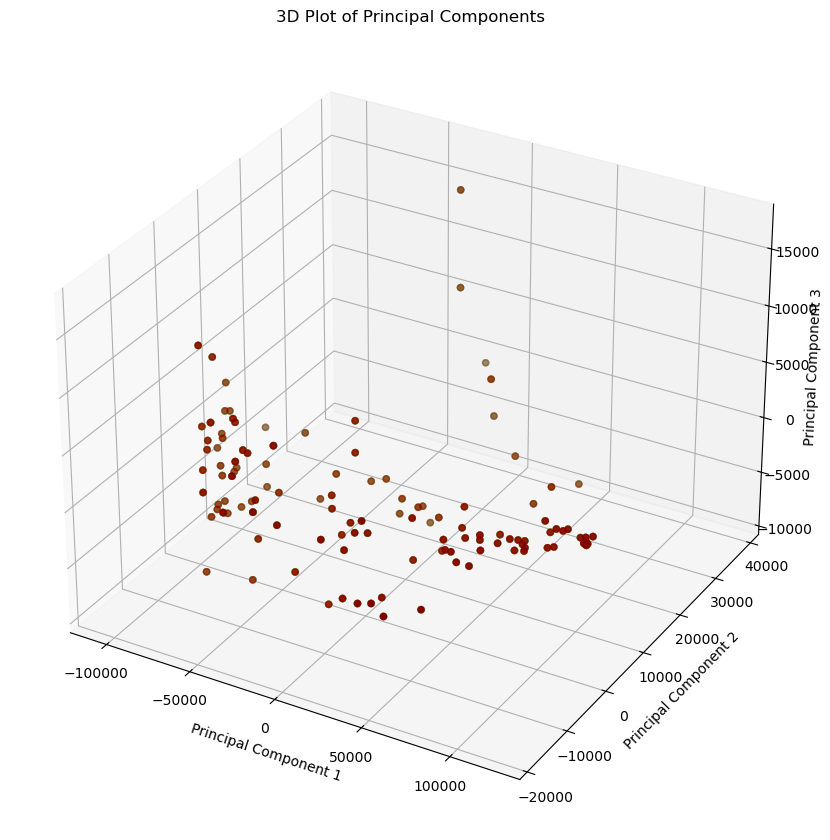

In [10]:

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.set_zlabel('Z Label', labelpad=0)

unique_labels = np.unique(y)

colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels))) 

for i, label in enumerate(unique_labels):
    ax.scatter(x_train[ : , 0],
               x_train[ : , 1],
               x_train[ : , 2],
               color=colors[i], label=f'Component {label}', marker='o')

# ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], c='r', marker='o')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Plot of Principal Components')

plt.subplots_adjust(left=1, right=2, bottom=0.1, top=0.9)


plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


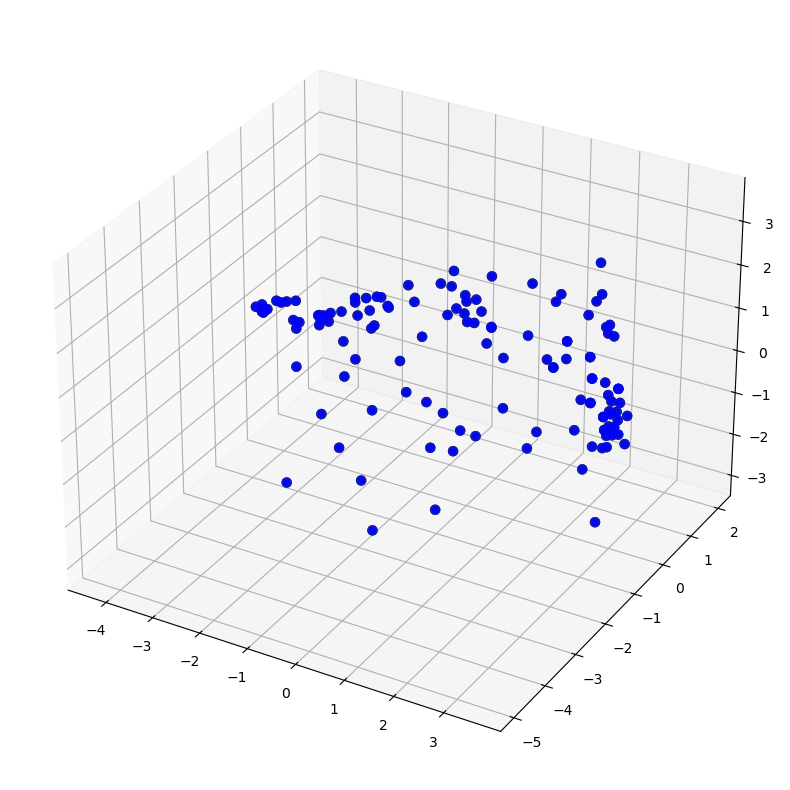

In [11]:
# Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=3)  # We want to reduce to 3 dimensions for our 3D plot
X_r = lda.fit(x_train, y_train).transform(x_train)

# Plot the LDA-transformed data in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b']
lw = 3

for color, i, target_name in zip(colors, [0, 1, 2], y_train):
    ax.scatter(X_r[:, 0], X_r[:, 1], X_r[:, 2], color=color, alpha=.8, lw=lw, label=target_name)

# ax.legend(loc='best', shadow=False, scatterpoints=1)
# ax.set_title('LDA of IRIS dataset')
# plt.show()

In [12]:
# Logistic Regression (Not used)
logr = LogisticRegression(solver = 'lbfgs')

# Reshape y_train into 1d array
y_train = np.ravel(y_train)

logr.fit(x_train, y_train)

actual_labels_test = np.concatenate(y_test)

pred_labels_train_logr = logr.predict(x_train)
print("LogR accuracy score on training set: {:0.2f}%".format(logr.score(x_train, y_train)))

pred_labels_test_logr = logr.predict(x_test)
print("LogR accuracy score on test set: {:0.2f}%".format(logr.score(x_test, y_test)))

print("\nActual vs Predicted Labels for Test: ")
print(actual_labels_test)
print(pred_labels_test_logr)


SyntaxError: invalid syntax (677044732.py, line 14)

In [ ]:
# Train SVM model on sensor data

svm = SVC(kernel='rbf')
svm.fit(x_train, y_train)

pred_labels_train_svm = svm.predict(x_train)
training_accuracy = accuracy_score(y_train, pred_labels_train_svm)
print("Training Accuracy: {:0.2f}%".format(training_accuracy))

pred_labels_test_svm = svm.predict(x_test)
test_accuracy = accuracy_score(y_test, pred_labels_test_svm)
print("Test Accuracy: {:0.2f}%".format(test_accuracy))

In [ ]:
# Knn (Higher Compute Cost)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train, y_train)

pred_labels_train_knn= knn.predict(x_train)
print("Accuracy of training set on Knn: {:0.2f}%".format(knn.score(x_train, y_train)))

# # pred_labels_val_knn = knn.predict(x_val)
# # print("Accuracy of validation set on Knn: {:0.2f}%".format(knn.score(x_val, y_val)))

pred_labels_test_knn= knn.predict(x_test)
print("Accuracy of test set on Knn: {:0.2f}%".format(knn.score(x_test, y_test)))

# print("\nActual vs Predicted Labels for Validation: ")
# print(actual_labels_val)
# print(pred_labels_val_knn)

print("\nActual vs Predicted Labels for Test: ")
print(actual_labels_test)
print(pred_labels_test_knn)



In [ ]:
with open('model.joblib', 'wb') as f:
    joblib.dump(svm,f)

In [ ]:
# Only use for testing ML endpoint
import boto3
import json

runtime_client = boto3.client('sagemaker-runtime')
content_type = "application/json"
# request_body = {"Input": [[ 0.25818199,  0.29820666,  0.24167116,  0.23193671,  0.22914108, 0.30743761, 0.249162 , 0.21419383]]}
request_body = {"Input": [[-1.30087652, -1.64633815, -1.60981466, -1.72198166, -1.42560473, -1.55332533, -1.10534774, -1.27594878]]} # correct prediction 
data = json.loads(json.dumps(request_body))
payload = json.dumps(data)
endpoint_name = "sklearn-local-ep2024-03-21-02-54-09"

response = runtime_client.invoke_endpoint(
    EndpointName=endpoint_name,
    ContentType=content_type,
    Body=payload)

result = json.loads(response['Body'].read().decode())[0]
# result = json.loads(response['Body'])

print(result)